# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

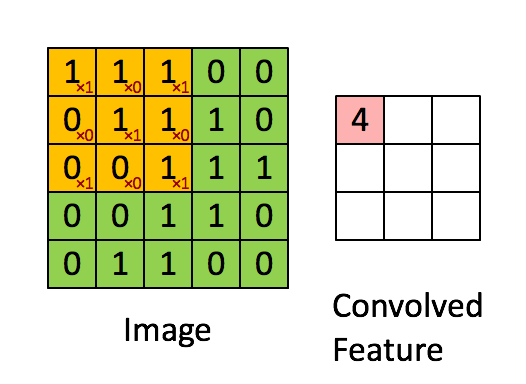

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

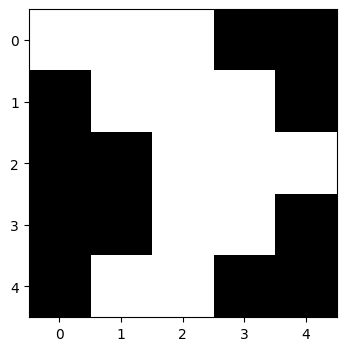

In [ ]:
# Visualizing the input.
plt.imshow(I)

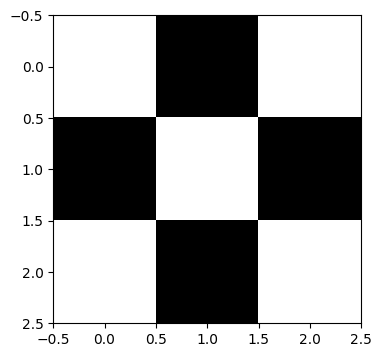

In [ ]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [ ]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

In [ ]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

dataset_path = "/content/drive/MyDrive/AIANDML/FruitinAmazon.zip"
extract_path = "/content/"
# Extract the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
os.listdir(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'FruitinAmazon', 'drive', 'sample_data']

In [ ]:
train_dir = "/content/drive/MyDrive/AIANDML/FruitinAmazon/train"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [ ]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels='inferred',
  label_mode='int',
  image_size =(img_height, img_width),
  interpolation='nearest',
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset='training',
  seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
  labels='inferred',
  label_mode='int',
  image_size =(img_height, img_width),
  interpolation='nearest',
  batch_size=batch_size,
  shuffle=False,
  validation_split=validation_split,
  subset='validation',
  seed=123
  )

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


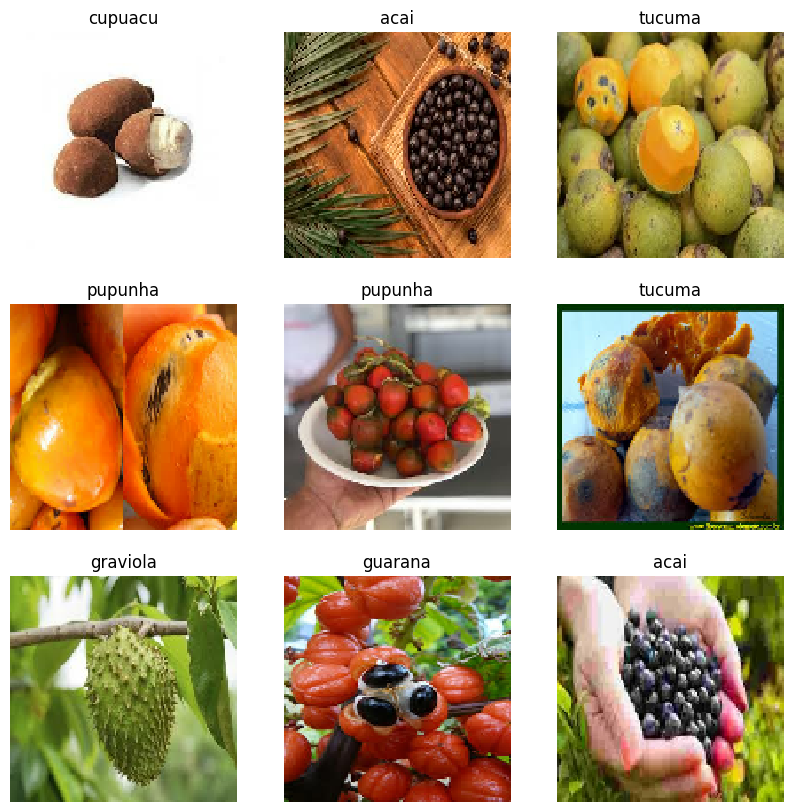

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [ ]:
def generate_model(image_height, image_width, nchannels, num_classes):
  """
  This function will generate a model with set of hyperparameters defined above.
  Input Args:
  image_height[int] = Height of an image.
  image_width[int] = Width of an image.
  nchannels[int] = Number of channels in image.
  num_classes[int] = Number of classes in dataset.
  Output Args:
  model-> A CNN model.
  """
  model = tf.keras.Sequential([
      # Rescaling and input layer, [For keras the input shape must be(image height, image width, channels)]
      layers.Rescaling(1./255, input_shape=(image_height,image_width,nchannels)),
      # First Block of Convolution and Pooling Operations.
      layers.Conv2D(32,
                    kernel_size=(3,3),
                     strides=(1),
                    padding="same",
                    activation="leaky_relu",
      kernel_initializer="glorot_uniform",
      bias_initializer="zeros"),
      layers.MaxPooling2D(pool_size=(2,2), strides=2),
      # Second Block of Convolution and Pooling Operations.
      layers.Conv2D(32,
                    kernel_size=(3,3),
                     strides=(1),
                    padding="same",
                    activation="leaky_relu",
      kernel_initializer="glorot_uniform",
      bias_initializer="zeros"),
      layers.MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

      layers.MaxPooling2D(),
      # Fully connected classifier.
      layers.Flatten(),
      layers.Dense(64, activation="leaky_relu"),
      layers.Dense(128, activation="leaky_relu"),
      layers.Dense(num_classes, activation="softmax")

  ])
  return model

img_height = 180
img_width = 180

In [ ]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 543,590 (2.07 MB)

 Trainable params: 543,590 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

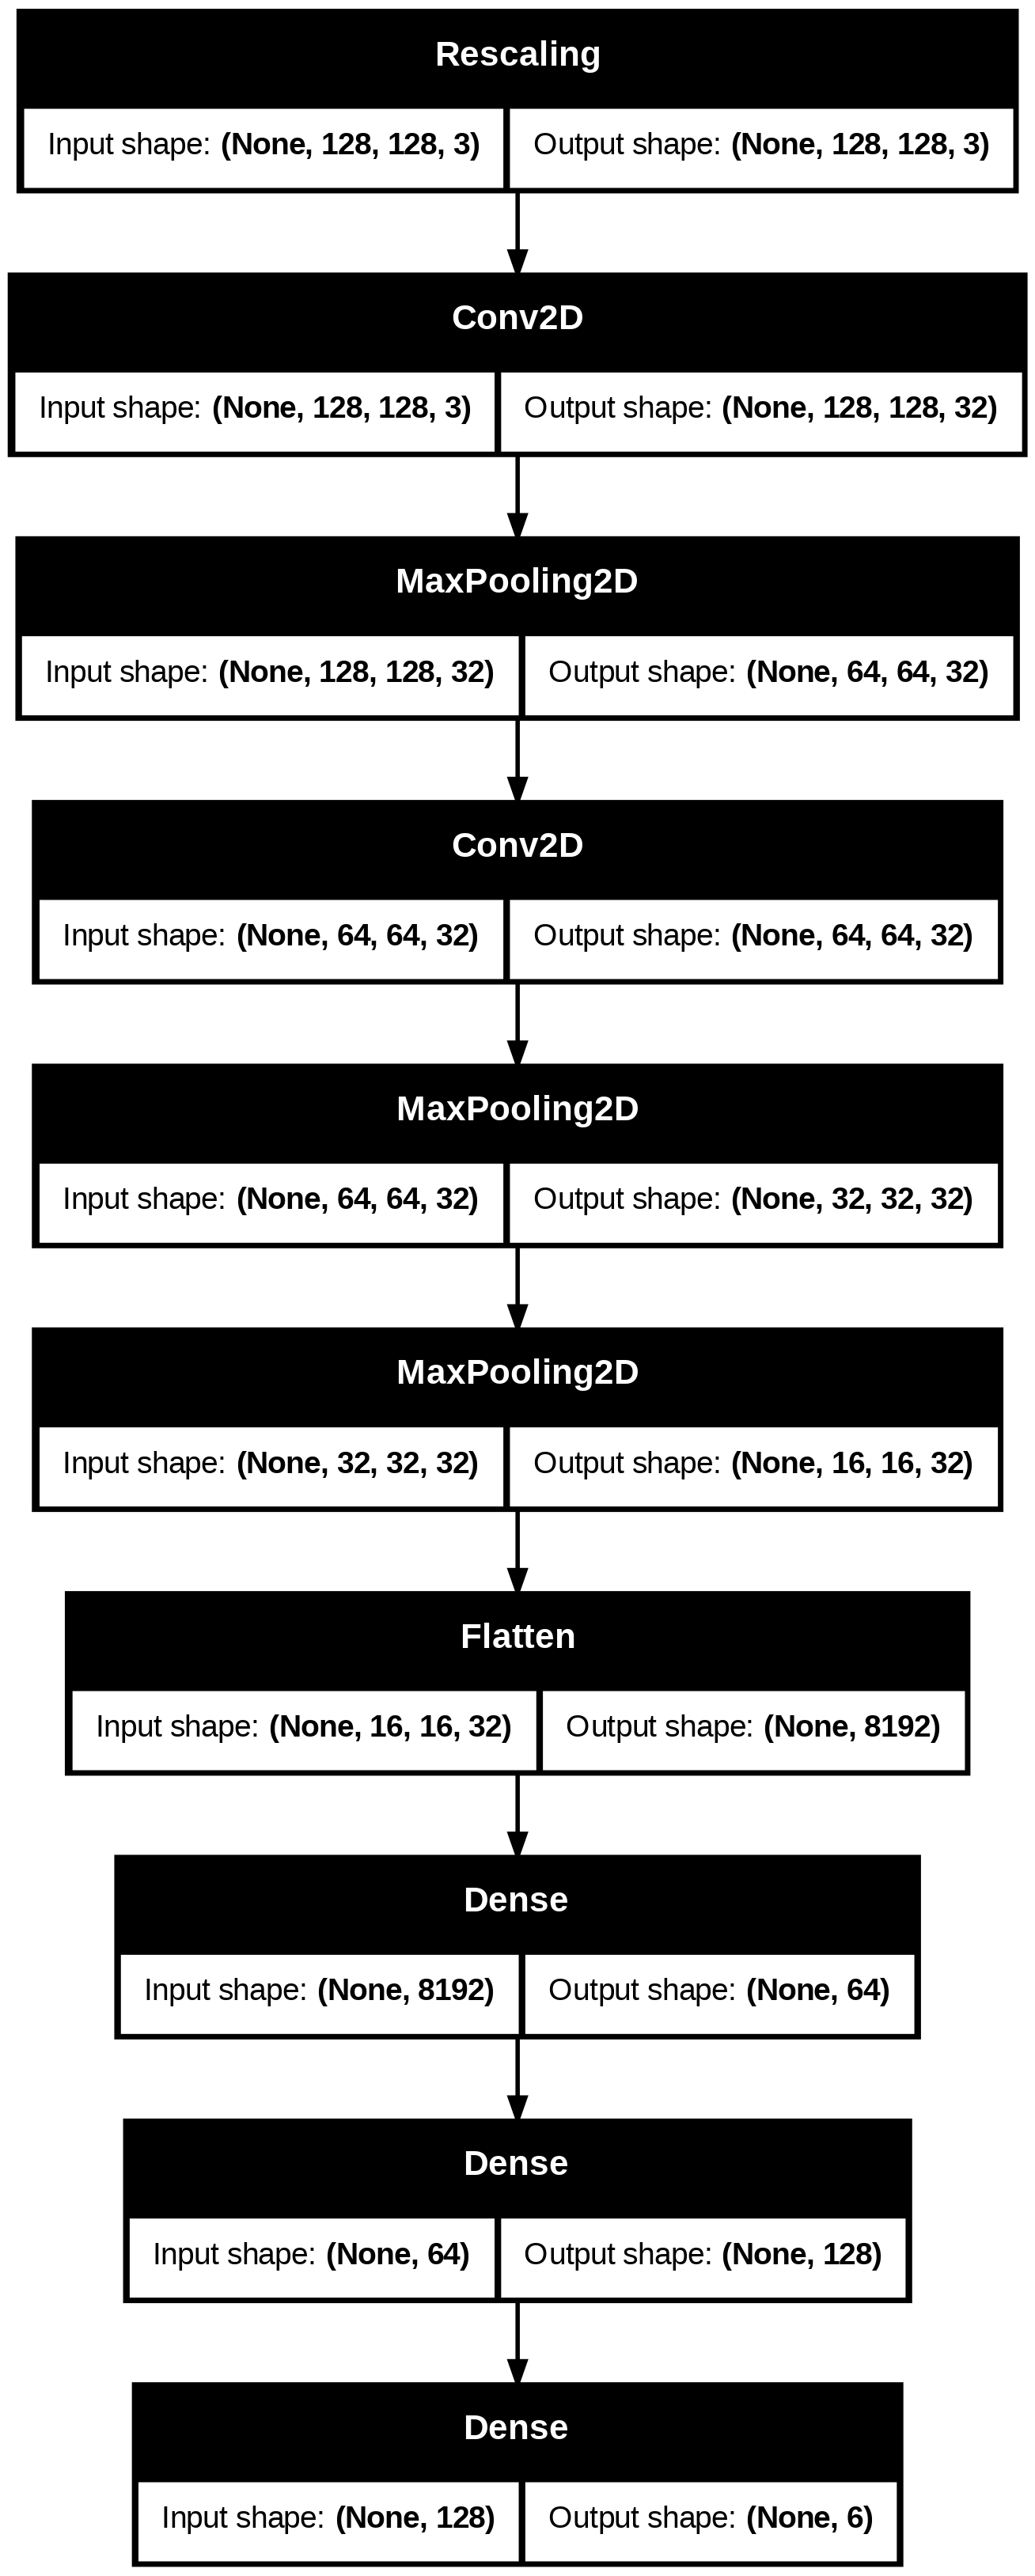

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [ ]:
import tensorflow as tf

loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [ ]:
epochs=250
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.1545 - loss: 1.9799 - val_accuracy: 0.0000e+00 - val_loss: 2.0764
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4401 - loss: 1.6873 - val_accuracy: 0.2222 - val_loss: 1.7746
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.2778 - loss: 1.5485 - val_accuracy: 0.2778 - val_loss: 1.8054
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4067 - loss: 1.3888 - val_accuracy: 0.2222 - val_loss: 1.6662
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5122 - loss: 1.2932 - val_accuracy: 0.3333 - val_loss: 1.6508
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6484 - loss: 1.0318 - val_accuracy: 0.3333 - val_loss: 1.4896
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6931 - loss: 0.9016 - val_accuracy: 0.5556 - val_loss: 1.0752
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7912 - loss: 0.6225 - val_accuracy: 0.7222 - val_l

## Observe the Model Performance.


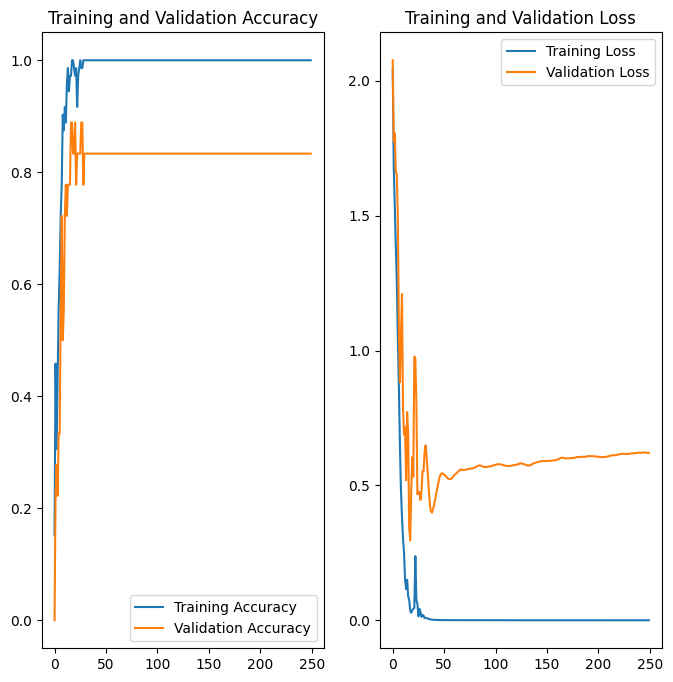

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()